Villalon Pineda Luis Enrique 

# Ejercicio 3

Utilizando el método de *Metropolis-Hastings*, con un periodo de calentamiento de 1000 iteraciones, simula de una distribución con función densidad:

$$
\pi(x) \propto x^{\alpha - 1} e^{-\beta x} \mathbf{1}_{[0,\infty)}(x).
$$

**EN ESTE EJERCICIO PUEDES USAR FUNCIONES PRETERMINADAS PARA SIMULAR VARIABLES ALEATORIAS NORMALES.** Debes de crear una función donde el usuario pueda especificar el número de muestras a simular, $m$, y los parámetros $\alpha > 0$ y $\beta > 0$ de la distribución. Además de esto, gráfica el histograma de la muestra obtenida.

Librerias

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Primero creo una funcion de unifrome para poder utilizarla en el metodo de Metropolis-Hastings

In [18]:
def uniformSimulation(n):
    return np.random.uniform(0, 1, n)

Procedemos a hacer la funcion de Metropolis-Hastings 

In [19]:
def MetropolisHastings(m, alpha, beta, sigma=1,hbi=1000):
    simulacion = np.zeros(m)
    indicador = lambda x: np.where(x >= 0, 1, 0)
    distribucion = lambda x : (x ** (alpha - 1)) * np.exp(-beta*x) * indicador(x)
    u = uniformSimulation(m + hbi)
    Z = np.random.normal(0, sigma, m + hbi)
    theta = 1.0
    i = 0
    while i < hbi:
        x_candidato = theta + Z[i]
        f_candidato = distribucion(x_candidato)
        f_actual = distribucion(theta)
        radio = np.min([1,f_candidato / f_actual])
        if u[i] < radio:
            theta = x_candidato
        i += 1
    j = 0
    while j < m:
        x_candidato = theta + Z[hbi + j]
        f_candidato = distribucion(x_candidato)
        f_actual = distribucion(theta)
        radio = f_candidato / f_actual if f_actual > 0 else (1 if f_candidato > 0 else 0)

        if u[hbi + j] < radio:
            theta = x_candidato

        simulacion[j] = theta
        j += 1
    return simulacion

Por lo tanto la grafica se veria asi

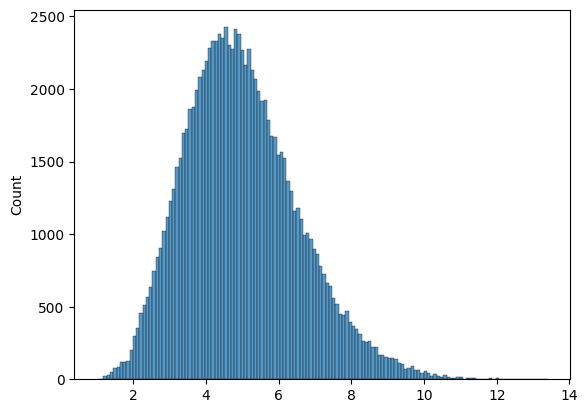

In [20]:
simulacion = MetropolisHastings(100_000, alpha=10, beta=2, sigma=1, hbi=1000)
sns.histplot(simulacion) # Me sirve para su graficacion 
plt.show()